<h1>Name: Disha Suthar</h1>
<h1>Roll_No: 241110021</h1>
<h1>Programme: M.Tech</h1>
<h1>Department: Computer Science and Engineering</h1>



---



---



In [2]:
pip install neurodynex3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: matplotlib
    Found ex

<h1>QUESTION 1</h1>

---



In [1]:
import numpy as np

Function to generate the pattern of desired size :: get_pattern

In [2]:
def get_patterns(pattern_size, number_of_patterns):
    np.random.seed(42)
    patterns = []
    for _ in range(number_of_patterns):
        pattern = np.random.choice([-1, 1], size=(pattern_size, pattern_size))
        patterns.append(pattern)
    #print(patterns)

    return np.array(patterns)

Function to currupt some patterns by fliping the random bits in given pattern: perturb_pattern

In [3]:
def perturb_pattern(pattern, nr_of_flips):

    pattern = np.array(pattern)
    shape = pattern.shape
    flat_pattern = pattern.flatten()
    num_elements = flat_pattern.size
    np.random.seed(42)
    flip_indices = np.random.choice(num_elements, size=nr_of_flips, replace=False)
    flat_pattern[flip_indices] *= -1
    perturbed_pattern = flat_pattern.reshape(shape)

    return perturbed_pattern

Function to calculate the weight matrix for given number of total p;atterns

In [4]:
def calculate_weights(patterns):
    n=len(patterns)
    #print("--",patterns.size)
    num_neurons = patterns.size//n
    #print("no of neurons",num_neurons)
    weight_matrix = np.zeros((num_neurons, num_neurons))

    for pattern in patterns:
        pattern = pattern.reshape(-1, 1)  # Reshape the pattern to a column vector
        weight_matrix += np.outer(pattern, pattern)  # Hebbian learning rule

    # Ensure no self-connections (diagonal is zero)
    np.fill_diagonal(weight_matrix, 0)
    weight_matrix = weight_matrix.astype(int)

    return weight_matrix

Function that return updates state in every iteration by converging the pattern

In [5]:
def network_evolution(S, weights,i):
    flattened = S.flatten()
    #flattened = np.array([arr.flatten() for arr in S])
    #print("flatt",flattened)
    number_of_neuron=len(flattened)
    #print("number of neuron",number_of_neuron)
     # To store the states at each step
    #merged = []

        # Update the state based on the weight matrix
    cur_S = np.sign(np.dot(weights[i], flattened))
    flattened[i]=cur_S
    #states.append(flattened.copy())


    #merged+=[np.reshape(flattened.copy(), (int(number_of_neuron**0.5),int(number_of_neuron**0.5)))]
    #print("states",states)
    #plot_tools.plot_pattern_list(merged)

    return flattened.reshape(S.shape[0],S.shape[0])

Main code for running this all functions

In [6]:
%matplotlib inline
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

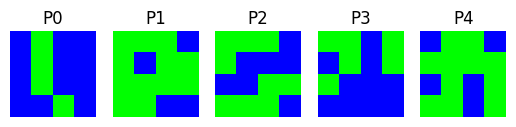

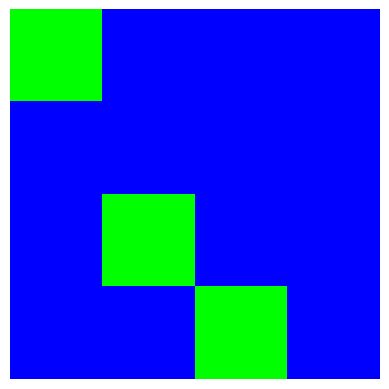

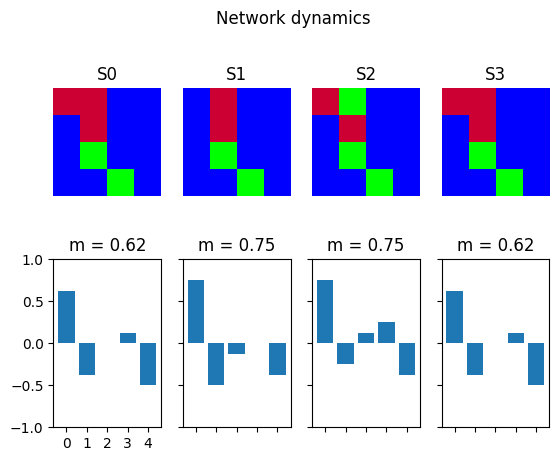

In [7]:
plist = get_patterns(4,5)
plot_tools.plot_pattern_list(plist)
cue = plist.copy()

S = perturb_pattern(cue[0],3)
wghts = calculate_weights(plist)
#print(wghts)

state_list =[S]


for i in range(3):
    state_list.append(network_evolution(S,wghts,i))

plot_tools.plot_pattern(state_list[0])
plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")

<h1>QUESTION 2</h1>

---



<h3>PART A</h3>

---



 The informativeness of the cue means if we flip less number of bits then model can retrieve the original pattern easily by converging but if we flip more number of bits then model can face difficulties to retrive the original pattern

In this part we will change some parameteres and will track the model accuracy.here model accuracy means out of all pixels how many pixels are correctly recognised by model. In first sub part we will gradually increase the number of flip bits and will see how model accuracy will affect

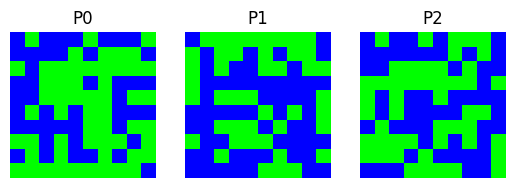

In [8]:
plist = get_patterns(10,3)
plot_tools.plot_pattern_list(plist)

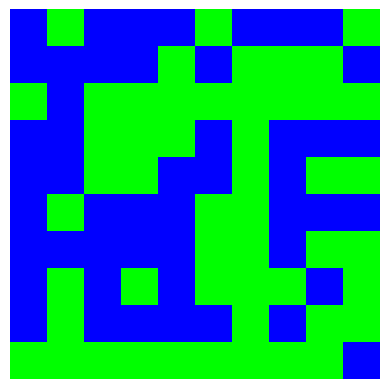

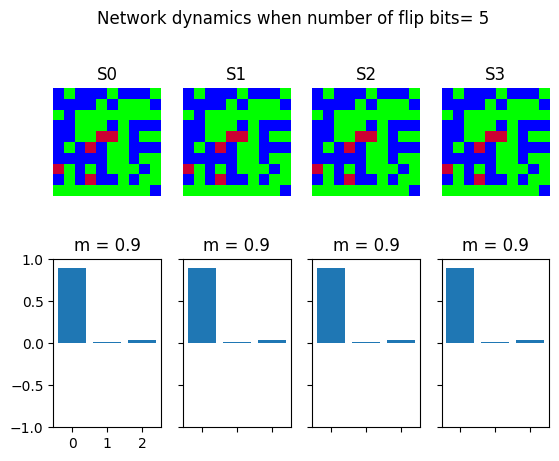

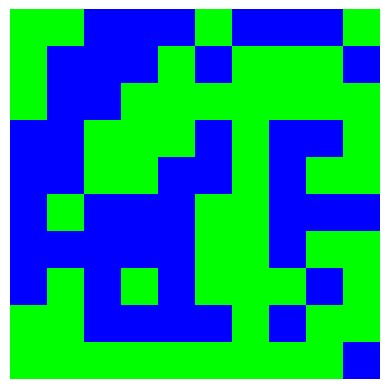

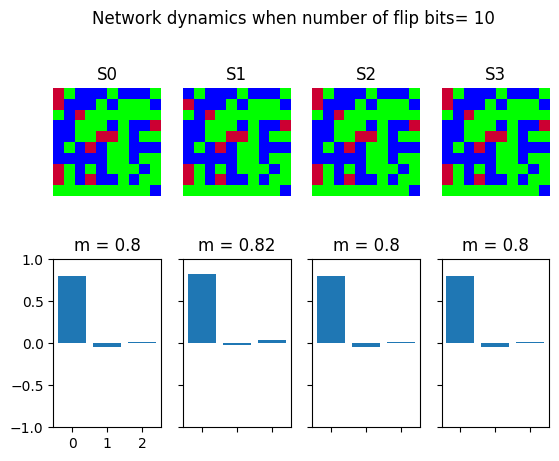

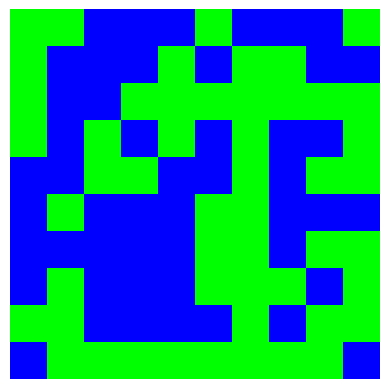

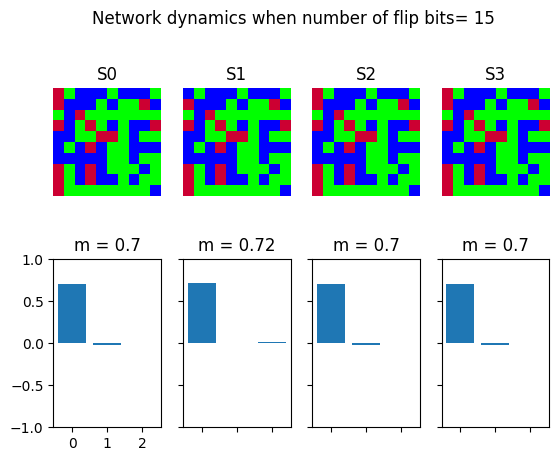

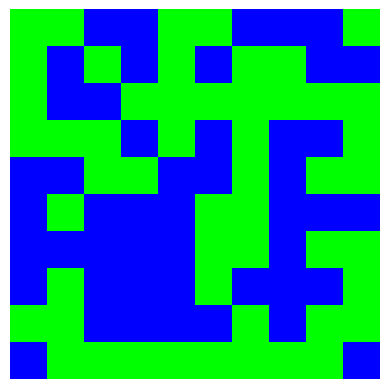

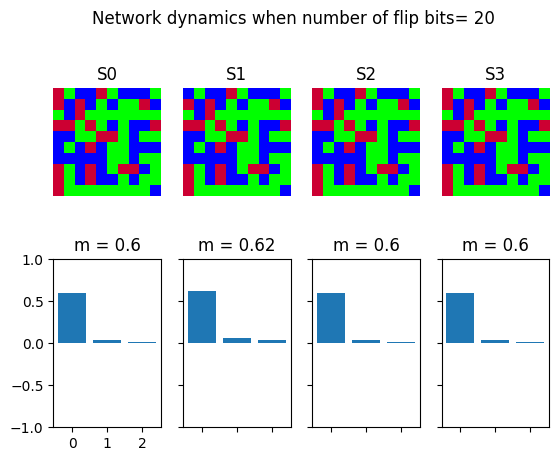

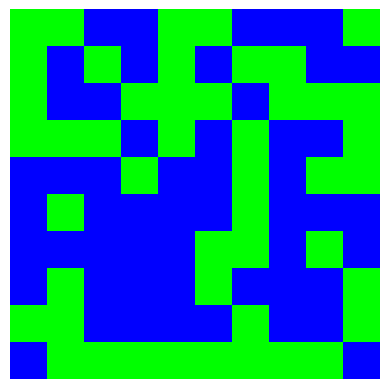

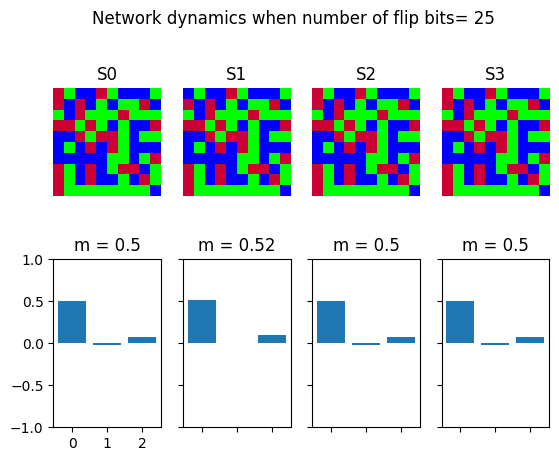

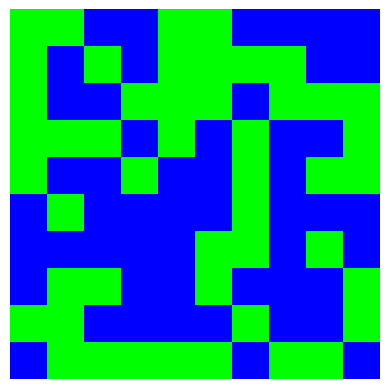

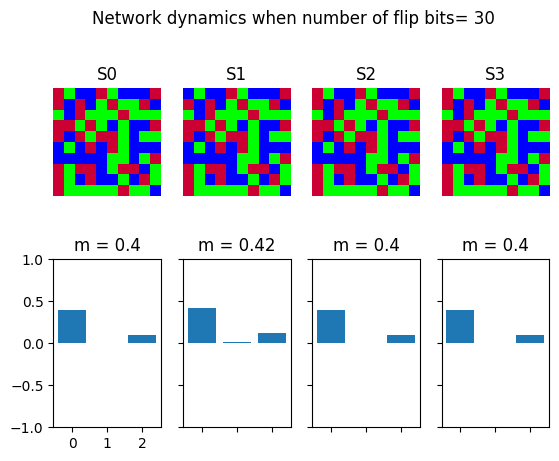

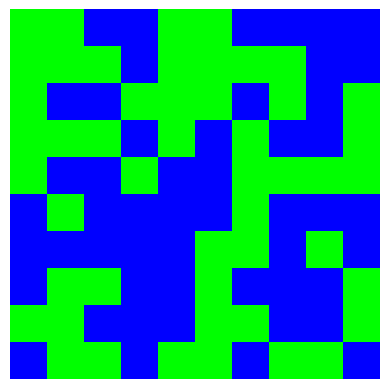

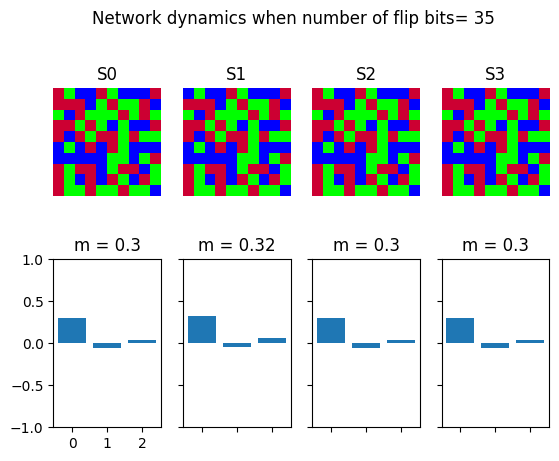

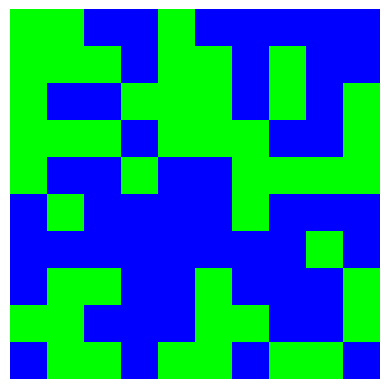

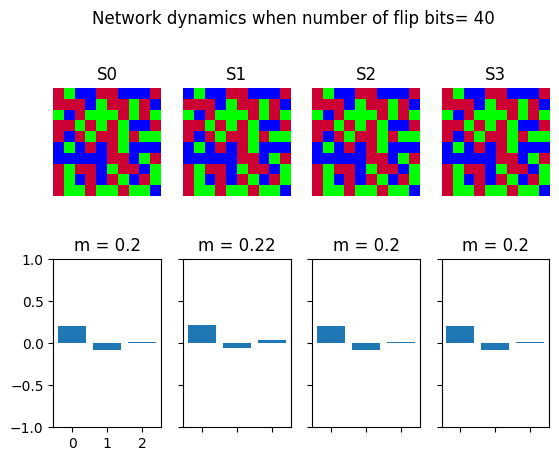

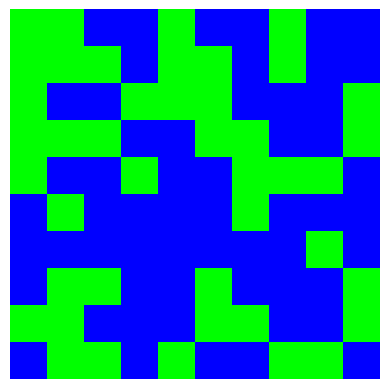

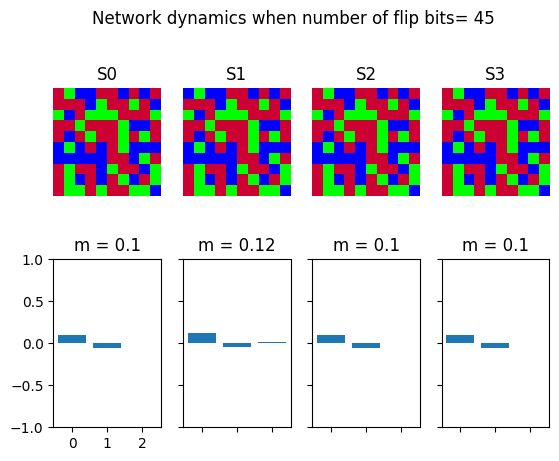

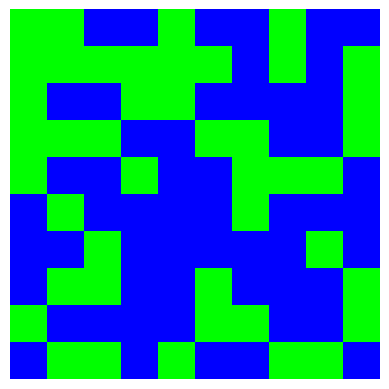

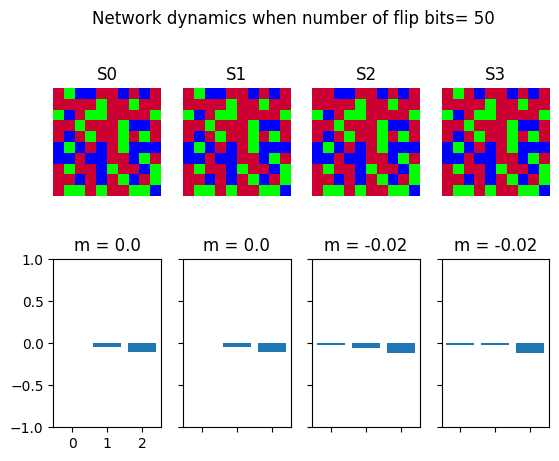

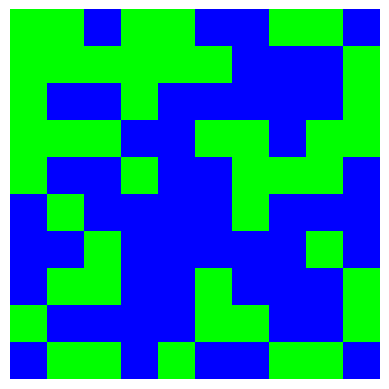

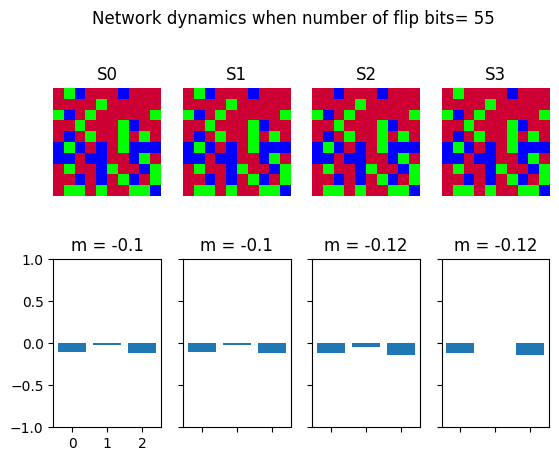

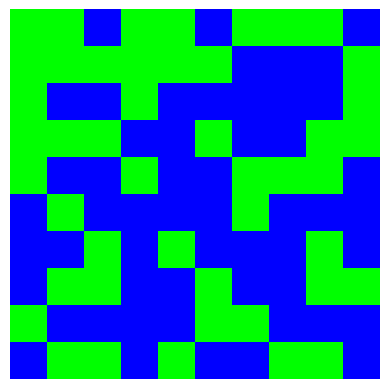

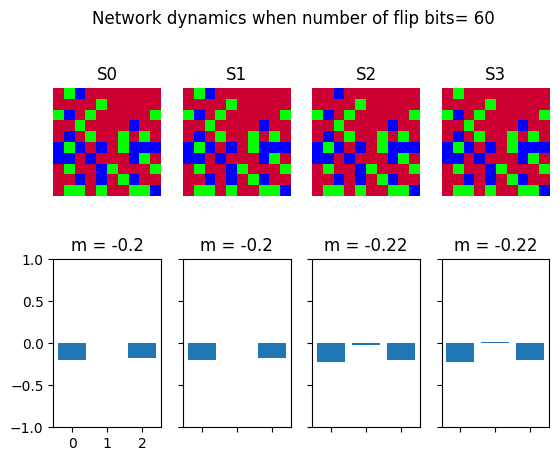

In [9]:
for j in range(5,61,5):


  cue = plist.copy()

  S = perturb_pattern(cue[0],j)
  wghts = calculate_weights(plist)
  #print(wghts)

  state_list =[S]


  for i in range(3):
      state_list.append(network_evolution(S,wghts,i))

  plot_tools.plot_pattern(state_list[0])
  plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle=f"Network dynamics when number of flip bits= {j}")

In [10]:
number_of_flips=[]
number_of_flips = list(range(5, 61, 5))
print(number_of_flips)


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


In [11]:
model_accuracy=[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,-0.02,-0.012,-0.22]  # here I create manual list to store the values of m

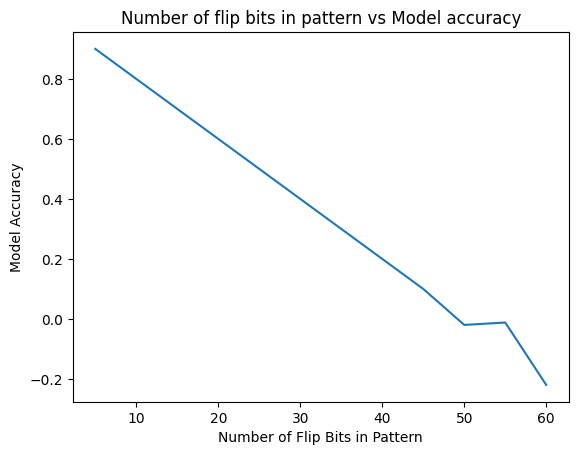

In [73]:
import matplotlib.pyplot as plt
# Plotting the data
plt.plot(number_of_flips, model_accuracy)

# Adding labels and title
plt.xlabel('Number of Flip Bits in Pattern')
plt.ylabel('Model Accuracy')
plt.title('Number of flip bits in pattern vs Model accuracy')

# Display the plot
plt.show()


As we can see by plot that if we flip more and more number of bits, model's recognisation capacity is decreasing. If our m=0.62 means out of all pixel;62% of pixels are recognised correctly by model

---



<h3>PART B</h3>

---



In this part we will change the size of pattern . like 4X4 then 7X7 and so on(difference of 3)

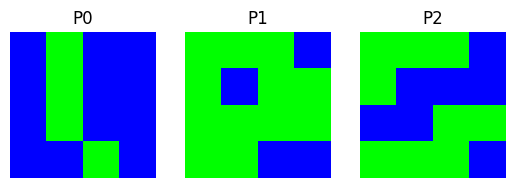

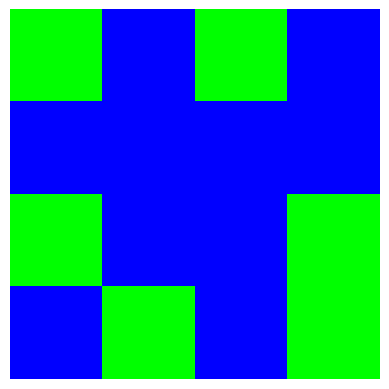

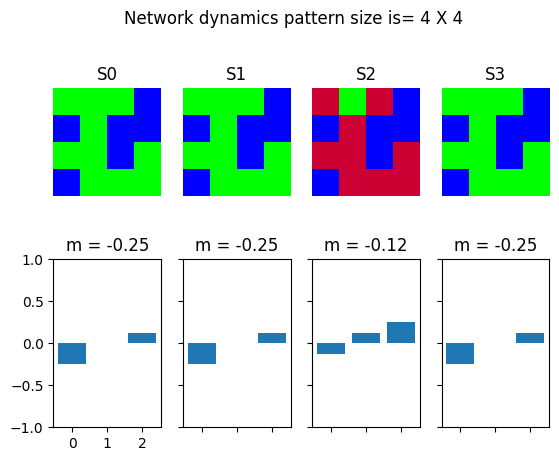

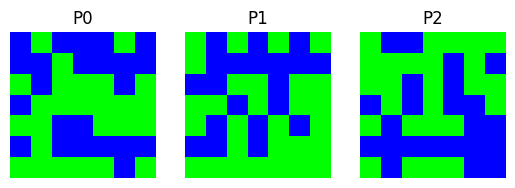

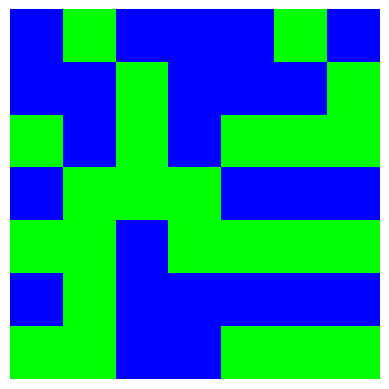

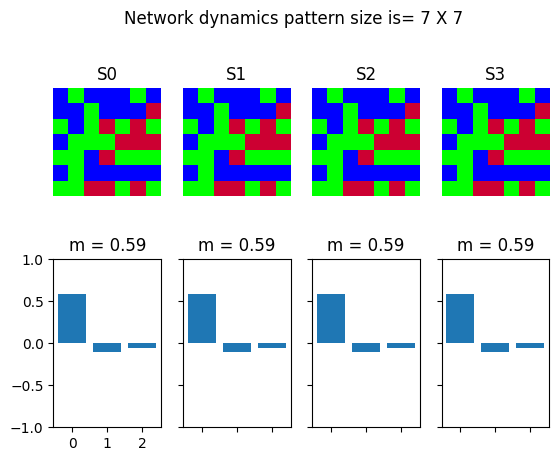

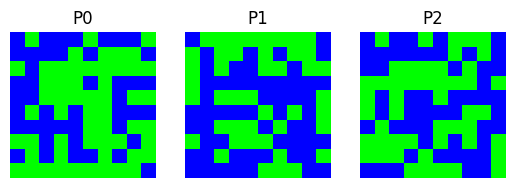

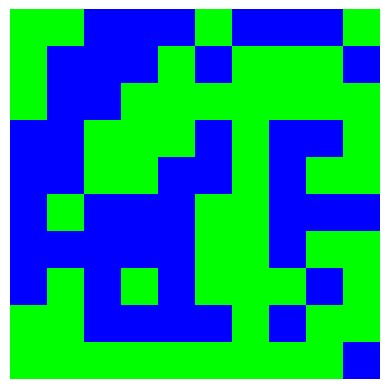

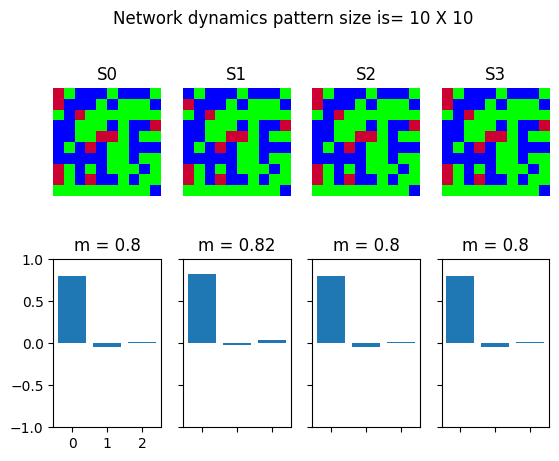

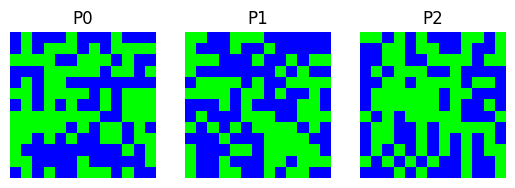

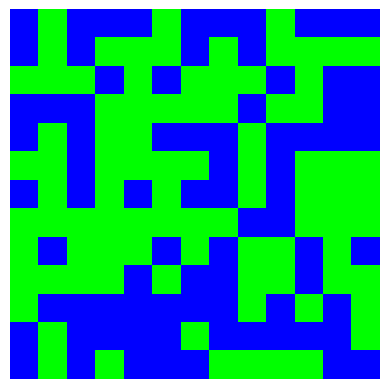

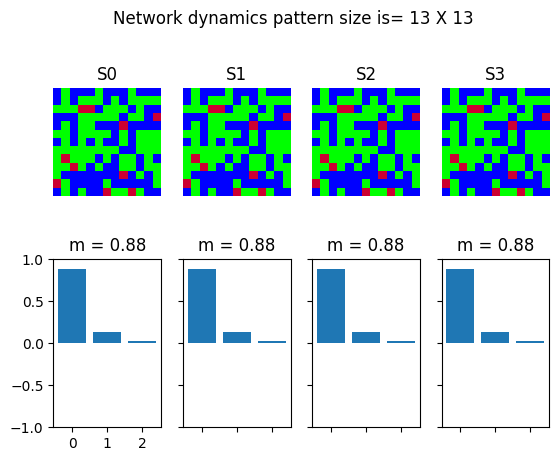

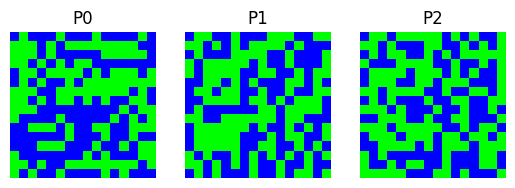

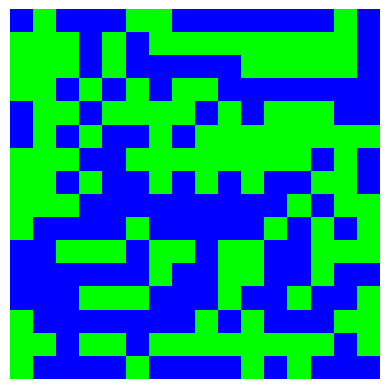

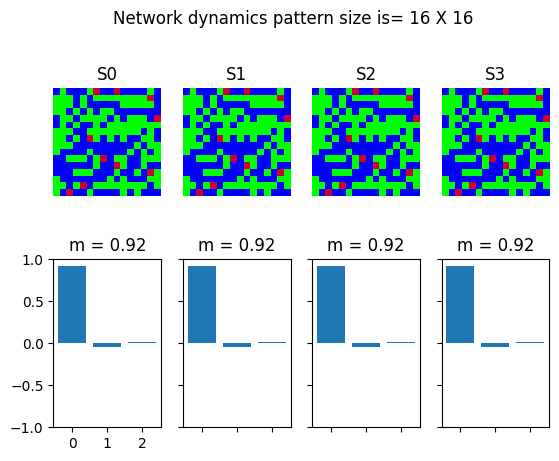

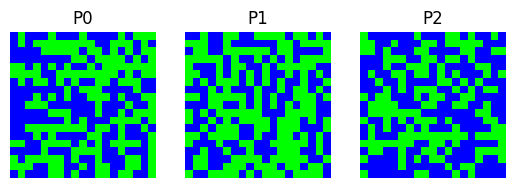

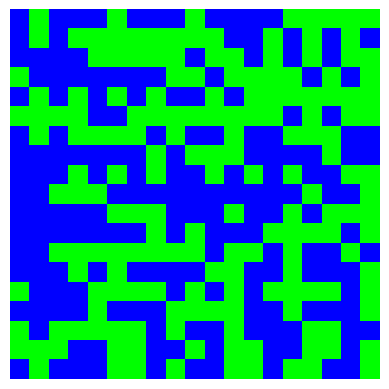

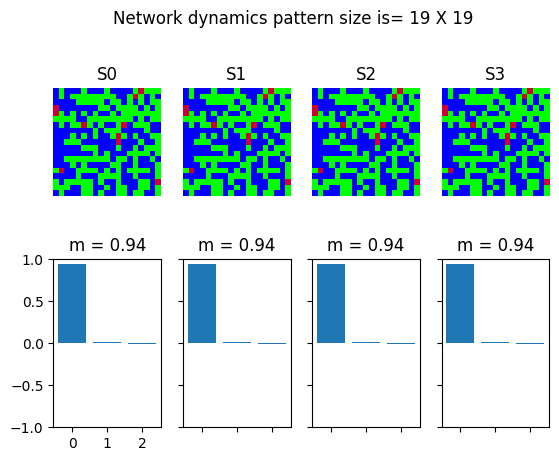

In [13]:
for j in range(4,20,3):
  plist = get_patterns(j,3)
  plot_tools.plot_pattern_list(plist)
  cue = plist.copy()

  S = perturb_pattern(cue[0],10)
  wghts = calculate_weights(plist)
  #print(wghts)

  state_list =[S]


  for i in range(3):
      state_list.append(network_evolution(S,wghts,i))

  plot_tools.plot_pattern(state_list[0])
  plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle=f"Network dynamics pattern size is= {j} X {j}")

In [14]:
size_of_network=list(range(4,20,3))

In [15]:
size_of_network

[4, 7, 10, 13, 16, 19]

In [16]:
model_accuracy2=[-0.25,0.59,0.8,0.88,0.92,0.94]

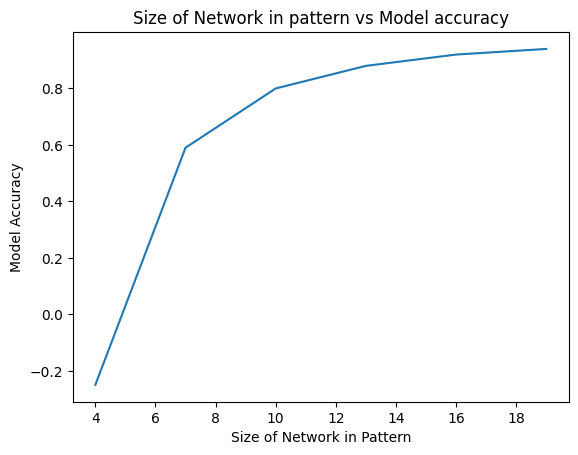

In [17]:
import matplotlib.pyplot as plt



# Plotting the data
plt.plot(size_of_network, model_accuracy2)

# Adding labels and title
plt.xlabel('Size of Network in Pattern')
plt.ylabel('Model Accuracy')
plt.title('Size of Network in pattern vs Model accuracy')

# Display the plot
plt.show()


By seeing plot we can conclude that if we increase the grid size(number of neurons); model's capacity to converging is increasing.

---



<h3>PART C</h3>

---



In this part we will increase the number of patterns. Surely we get different weight matrix as number of pattern increases

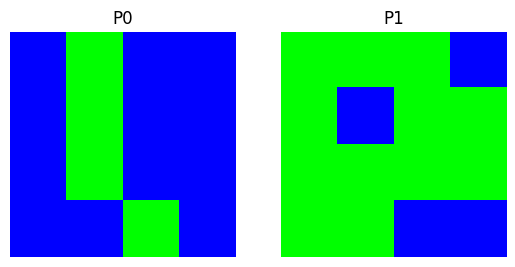

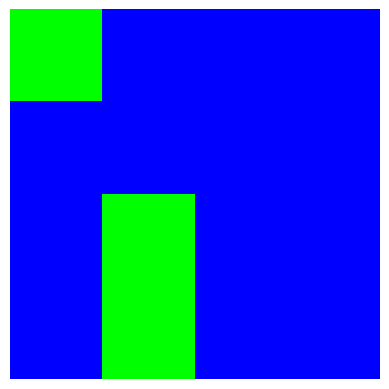

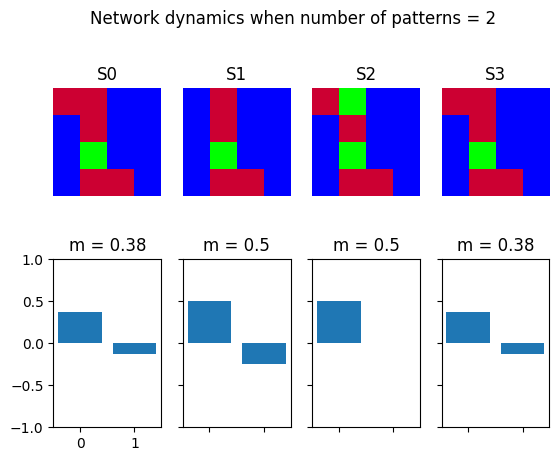

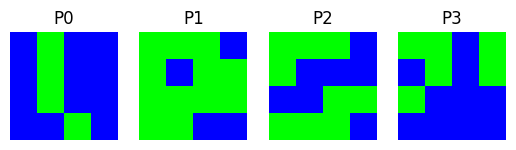

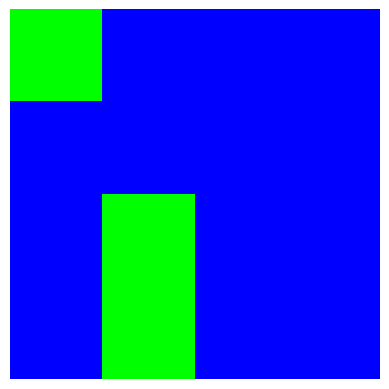

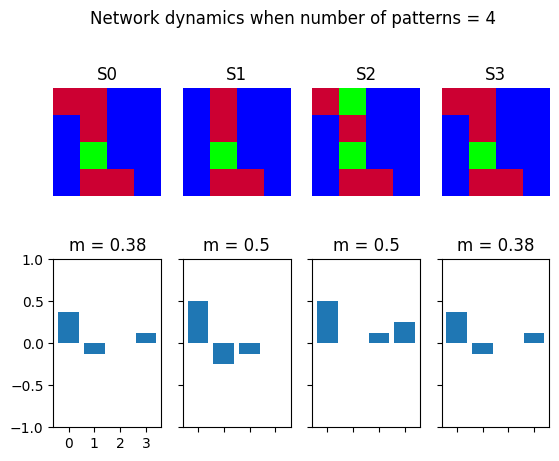

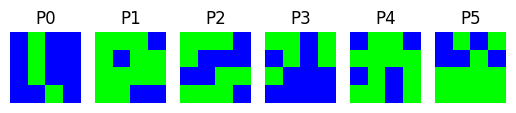

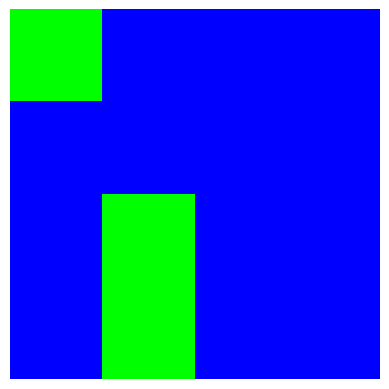

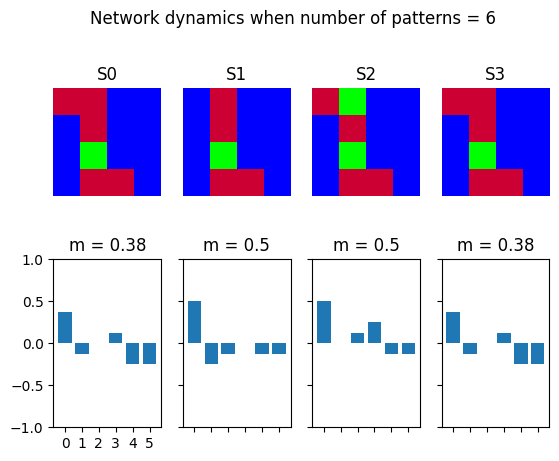

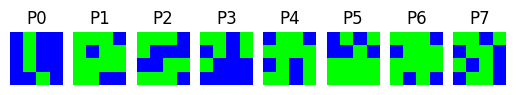

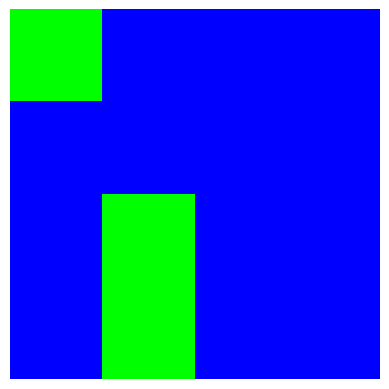

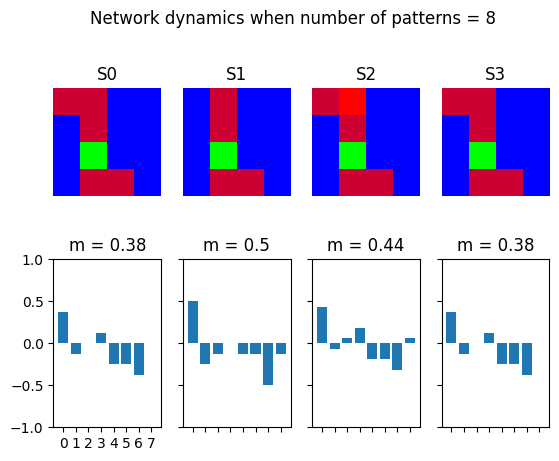

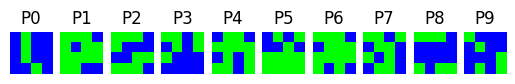

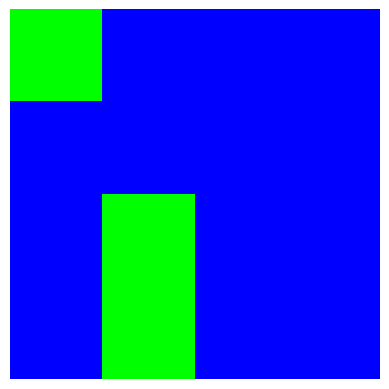

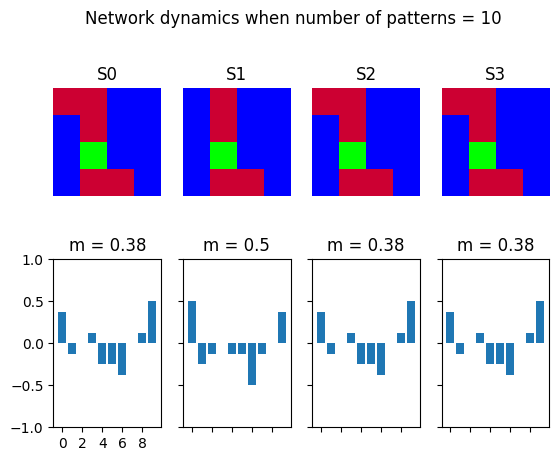

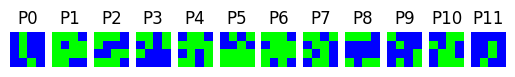

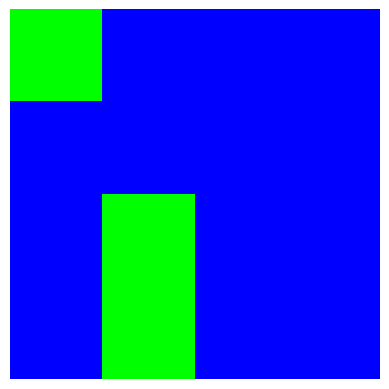

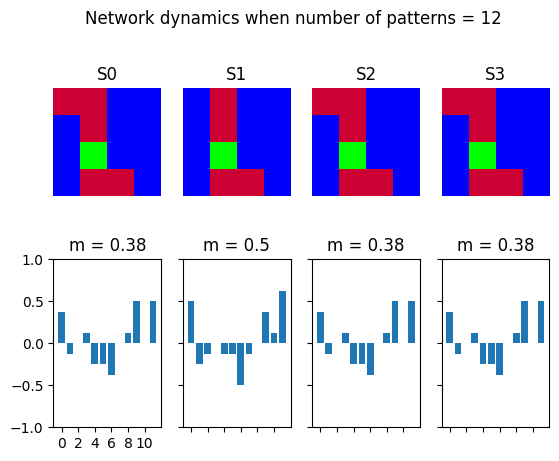

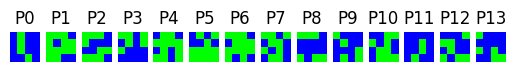

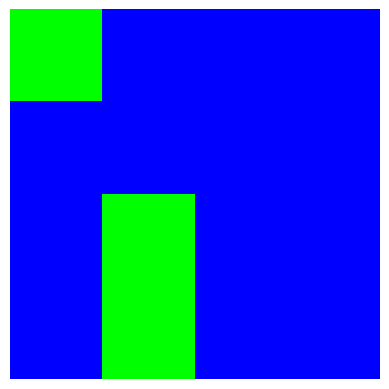

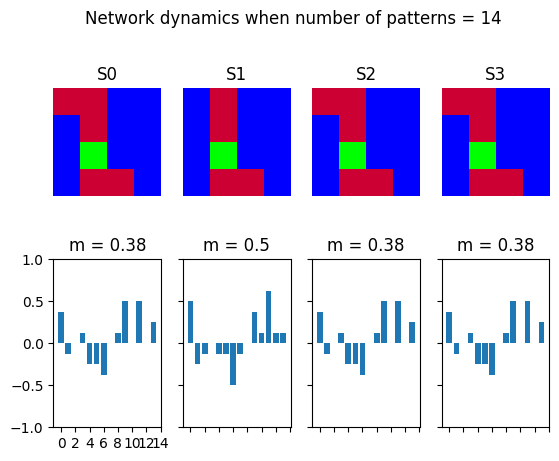

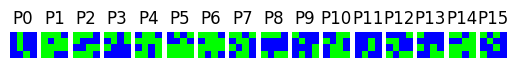

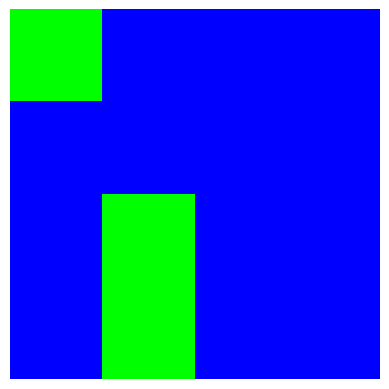

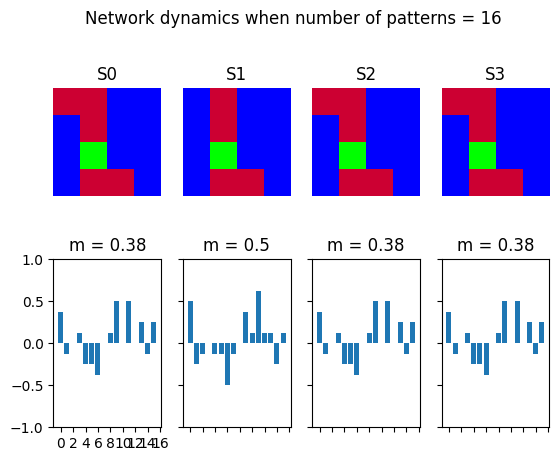

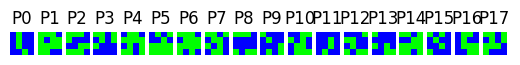

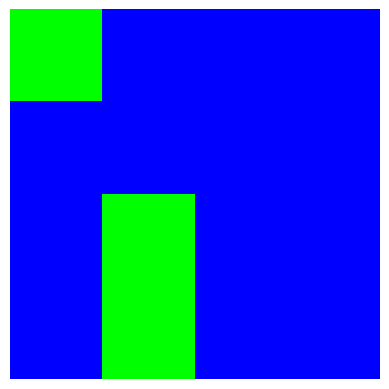

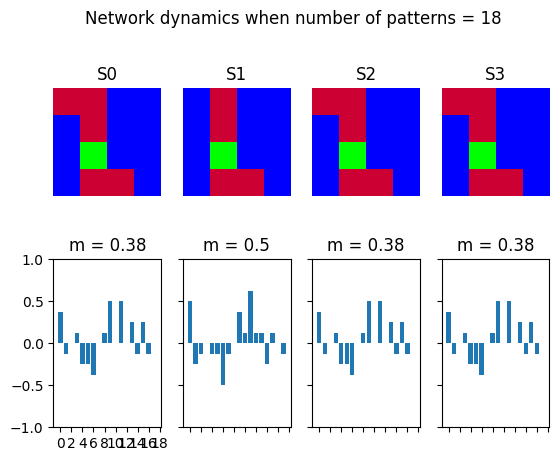

In [18]:
for k in range(2,20,2):
  plist = get_patterns(4,k)
  plot_tools.plot_pattern_list(plist)
  cue = plist.copy()

  S = perturb_pattern(cue[0],5)
  wghts = calculate_weights(plist)
  #print(wghts)

  state_list =[S]


  for i in range(3):
      state_list.append(network_evolution(S,wghts,i))

  plot_tools.plot_pattern(state_list[0])
  plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle=f"Network dynamics when number of patterns = {k}")

In [19]:
network_size=list(range(2,20,2))

In [20]:
network_size

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [21]:
network_size=[x**2 for x in network_size]

In [22]:
network_size

[4, 16, 36, 64, 100, 144, 196, 256, 324]

In [23]:
model_accuracy3=[]

In [24]:
for i in range(9):
  model_accuracy3+=[0.38]


In [25]:
model_accuracy3

[0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38]

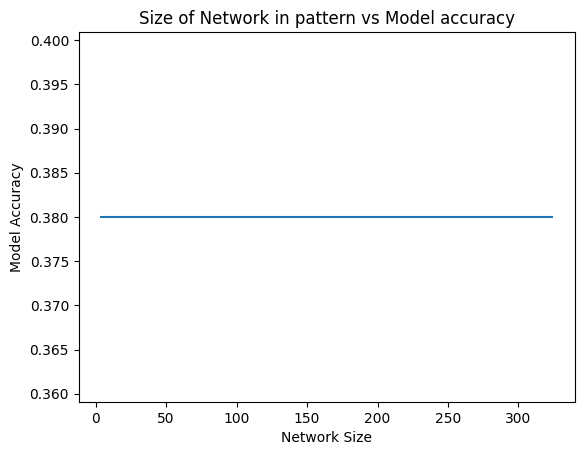

In [26]:
import matplotlib.pyplot as plt



# Plotting the data
plt.plot(network_size, model_accuracy3)

# Adding labels and title
plt.xlabel('Network Size')
plt.ylabel('Model Accuracy')
plt.title('Size of Network in pattern vs Model accuracy')

# Display the plot
plt.show()




---



<h1>QUESTION 3</h1>

---



<h3>Loading MNIST dataset from tensorflow library.


*   MNIST dataset is the dataset of handwritten digits. There are 70,000 images of size 28X28. Each image is in RGB(Red,Green,Blue) form.There are 60,000 images for training means our model will learn based on these images and then we will check our model performance on 10,000 test images
*   In this part of question , as we want to run hopfield model on this dataset we need to convert these images in 1's & -1's format.
</h3>

In [27]:
import tensorflow as tf
import numpy as np

In [28]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check the shape of the data
print(f"Shape of Training data: {x_train.shape},Shape of Class Label: {y_train.shape}")
print(f"Shape of Testing data: {x_test.shape}, Shape of Class Label: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of Training data: (60000, 28, 28),Shape of Class Label: (60000,)
Shape of Testing data: (10000, 28, 28), Shape of Class Label: (10000,)


here key is class label and pair is all the images belongs to that class

In [29]:
# Initializing a dictionary to hold images for each class
class_wise_images = {i: [] for i in range(10)}

# Separating the images class-wise
for i in range(len(y_train)):
    label = y_train[i]
    class_wise_images[label].append(x_train[i])

# Convert lists to numpy arrays
for label in class_wise_images:
    class_wise_images[label] = np.array(class_wise_images[label])

# Example: Accessing images for class 2
print(f"Number of images in class 2: {len(class_wise_images[2])}")
print(f"Shape of images in class 2: {class_wise_images[2].shape}")
# here I am doing some basic accessing stuff to get idea about my data structures

Number of images in class 2: 5958
Shape of images in class 2: (5958, 28, 28)


In [30]:
class_wise_images[4][40] # accesing image number 41 of digit "4"

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 182,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 130, 181,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 191, 181,   0,   0,
          0,   0,   0,   0,  13,  80,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  84, 254, 105,   0,   0,
          0,   0,   0,   0, 165, 244,  49,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 179, 252,  70,   0,   0,
          0,   0,   0,  39, 250, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 188, 228,   0,   0,   0,
          0,   0,   0,  42, 255,  90,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  33, 247, 136,   0,   0,   0,
          0,   0,   0, 133, 254,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 254, 125,   0,   0,   0,
          0,   0,   0, 172, 254,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 254, 125,   0,   0,   0,
          0,   0,  43, 252, 254,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 254, 125,   0,   0,   0,
          0,   0, 100, 254, 254,  64,  53,  61, 128,   8,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  37, 254, 228, 203, 197, 100,
        144, 203, 223, 254, 254, 254, 254, 254, 228,  22,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,  82, 209, 254, 254, 254,
        254, 254, 254, 254, 240, 115, 109, 109,  37,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  62, 111,  98,
         62,  84, 237, 240,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  50, 252, 213,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  53, 254, 213,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 104, 254, 161,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 156, 254,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          5, 241, 169,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         72, 254, 218,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         25, 254, 214,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [31]:
class_wise_images[4][40].shape   # shape of an image

(28, 28)

In [32]:
# Flatten the images in the class-wise dictionary
for label in class_wise_images:
    class_wise_images[label] = class_wise_images[label].reshape(class_wise_images[label].shape[0], -1)

# Example: Accessing the flattened images for class 3
print(f"Shape of flattened images in class 3: {class_wise_images[3].shape}")


Shape of flattened images in class 3: (6131, 784)


As our images in RGB format and our hopfield can work on pattern of 1's and -1's hence I convert RGB images to given format by defining one threshold value. i.e.127.

In [33]:
# Convert flattened images to 1 and -1 based on the threshold
threshold = 127

for label in class_wise_images:
    class_wise_images[label] = np.where(class_wise_images[label] > threshold, 1, -1)
#print(class_wise_images[4][40])


Here I am plotting that black and white images where I make -1 as 0 and 1 as 1

In [34]:
import matplotlib.pyplot as plt

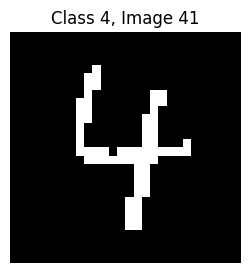

In [35]:
flattened_image = class_wise_images[4][40]

# Reshape the flattened image to 28x28 because we already flattened
reshaped_image = flattened_image.reshape(28, 28)

# Convert -1 to 0 (black) and 1 to 1 (white) for plotting
visual_image = (reshaped_image + 1) / 2  # Convert -1 to 0 and 1 to 1
# here I took some online references for plotting

# Display the image
plt.figure(figsize=(3, 3))
plt.imshow(visual_image, cmap='gray', vmin=0, vmax=1)
plt.title('Class 4, Image 41')
plt.axis('off')
plt.show()

Here I am plotting original image and 1's and -1's image of digit 8

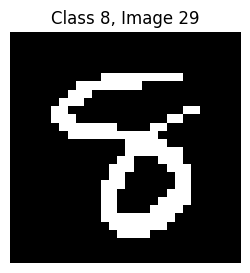

In [36]:
flattened_image = class_wise_images[8][28]
reshaped_image = flattened_image.reshape(28, 28)
visual_image = (reshaped_image + 1) / 2
plt.figure(figsize=(3, 3))
plt.imshow(visual_image, cmap='gray', vmin=0, vmax=1)
plt.title('Class 8, Image 29')
plt.axis('off')
plt.show()


plotting original image(RGB format)

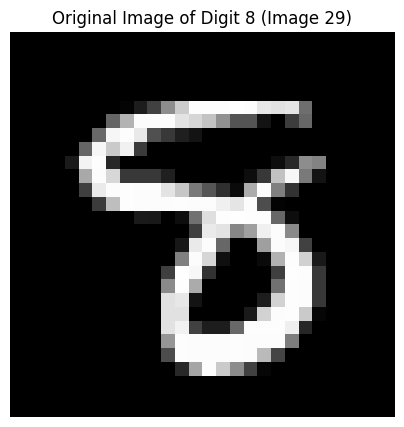

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Find all indices of images labeled as "8"
indices_of_8 = np.where(train_labels == 8)[0]

# Select the 29th image of class "8" (28th index since Python indexing starts at 0)
image_29_of_8 = train_images[indices_of_8[28]]

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(image_29_of_8, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image of Digit 8 (Image 29)')
plt.axis('off')  # Hide the axis
plt.show()


Here I am plotting some images of every class which is in 1's and -1's format

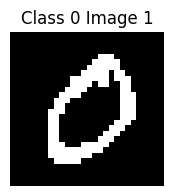

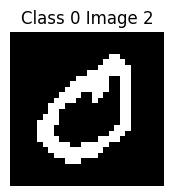

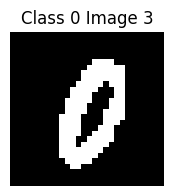

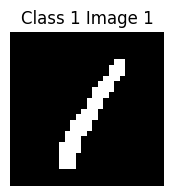

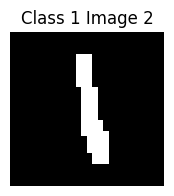

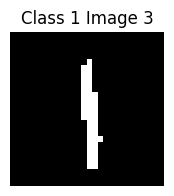

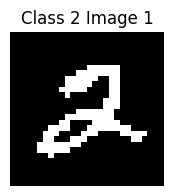

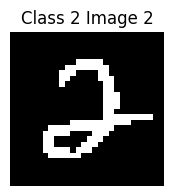

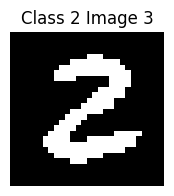

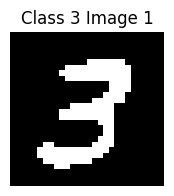

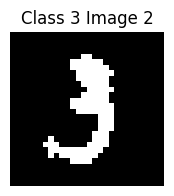

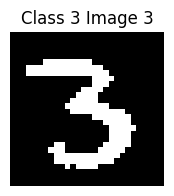

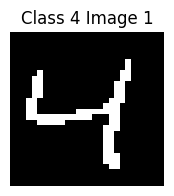

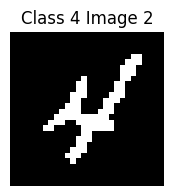

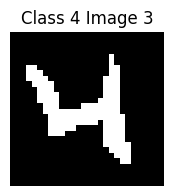

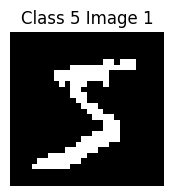

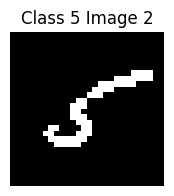

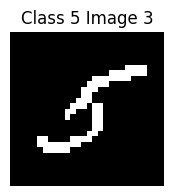

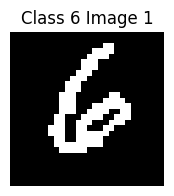

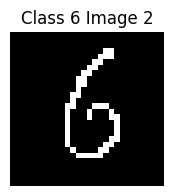

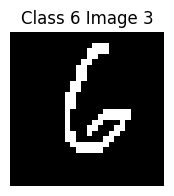

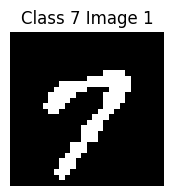

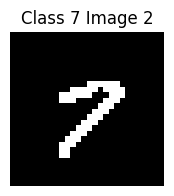

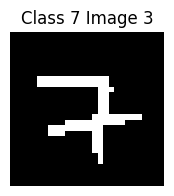

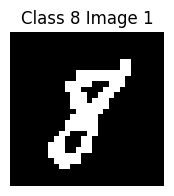

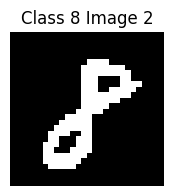

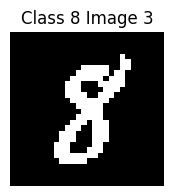

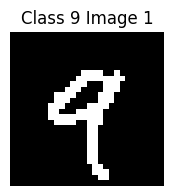

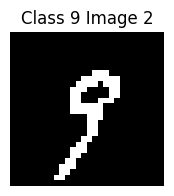

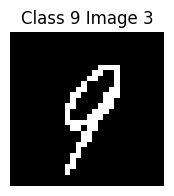

In [45]:
# Iterate over each class in the dictionary
for label in class_wise_images:
    # Get the list of images for the current class
    images = class_wise_images[label]

    # Plot the first 3 images in each class as an example
    for i, img in enumerate(images[:3]):
        reshaped_img = img.reshape(28, 28)
        visual_image = (reshaped_img + 1) / 2

        plt.figure(figsize=(2, 2))
        plt.imshow(visual_image, cmap='gray', vmin=0, vmax=1)
        plt.title(f'Class {label} Image {i+1}')
        plt.axis('off')
        plt.show()



In [46]:
class_wise_images[4].shape # trying to print shape for better understanding

(5842, 784)



---



<h1>QUESTION 4</h1>

---



Now we have many images for each class labels so let we average the all same class images. It indicates that averagly how a digit looks like.

In [47]:
# Initialize a dictionary to store the class-wise averages
class_wise_averages = {}

for label in class_wise_images:
    # Calculate the average (mean) across all images in the class
    class_wise_averages[label] = np.mean(class_wise_images[label], axis=0)
#print(f"Average for class 6:\n{class_wise_averages[6]}")
# we can uncomment above line and can see average class of 6


average images can have values in floating (if we print above line then we can see that) so we will convert it in 1's and -1's using threshold value = 0

In [48]:
# Initialize a dictionary to store the class-wise averages in 1 and -1 form
class_wise_averages_binary = {}
# Define the threshold (0 is the midpoint for averages)
threshold = 0
for label in class_wise_images:
    # Calculate the average (mean) across all images in the class
    class_wise_averages[label] = np.mean(class_wise_images[label], axis=0)

    # Convert the averages to 1 and -1 based on the threshold
    class_wise_averages_binary[label] = np.where(class_wise_averages[label] > threshold, 1, -1)

# Example: Print the binary average for class 6
#print(f"Binary average for class 6:\n{class_wise_averages_binary[6]}")


In [49]:
#class_wise_averages_binary (we can print and see)

In [50]:
# Here I am defining same weight matrix again to avoid long scrolling and seeing the logic for my understanding
def calculate_weights(patterns):
    n = len(patterns)
    num_neurons = patterns.size // n
    weight_matrix = np.zeros((num_neurons, num_neurons))

    for pattern in patterns:
        pattern = pattern.reshape(-1, 1)  # Reshape the pattern to a column vector
        weight_matrix += np.outer(pattern, pattern)  # Hebbian learning rule

    # Ensure no self-connections (diagonal is zero)
    np.fill_diagonal(weight_matrix, 0)
    weight_matrix = weight_matrix.astype(int)

    return weight_matrix

In [51]:
#class_wise_averages_binary[4] (printing for my understanding)

Now we average the all same class images so we have 10 class with one average image of that class

In [52]:
# Initialize an empty list to store the binary averages as arrays
binary_average_arrays = []

# Iterate over each class in the binary averages dictionary
for label in range(10):  # Assuming classes are 0 to 9
    binary_average_arrays.append(class_wise_averages_binary[label])

# Convert the list of arrays into a single NumPy ndarray for better understanding
binary_average_ndarray = np.array(binary_average_arrays)

# Print the shape of the resulting ndarray
print(f"Shape of binary_average_ndarray: {binary_average_ndarray.shape}")

Shape of binary_average_ndarray: (10, 784)


In [53]:
# calling calculate weight matrix function
weight_matrix_from_binary_averages = calculate_weights(binary_average_ndarray)
# Printing the weight matrix
print(f"Weight matrix from binary averages:\n{weight_matrix_from_binary_averages}")


Weight matrix from binary averages:
[[ 0 10 10 ... 10 10 10]
 [10  0 10 ... 10 10 10]
 [10 10  0 ... 10 10 10]
 ...
 [10 10 10 ...  0 10 10]
 [10 10 10 ... 10  0 10]
 [10 10 10 ... 10 10  0]]


In [54]:
weight_matrix_from_binary_averages.shape # printing shape of weight matrix

(784, 784)

Now we will flatten our test images and call network evalution fuunction where test image is our perburted image

In [55]:
# Flatten the test images
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
print(f"Shape of flattened test images: {x_test_flattened.shape}")


Shape of flattened test images: (10000, 784)


Convert test images in 1's and -1's format

In [56]:
#threshold=127
x_test_binary = np.where(x_test_flattened > 127, 1, -1)
# Print the shape of the binary test images to verify
print(f"Shape of binary test images: {x_test_binary.shape}")
# Example: Print the first binary test image
#print(f"First binary test image:\n{x_test_binary[0]}")


Shape of binary test images: (10000, 784)


In [57]:
def network_evolution(S, weights,i):
    flattened = S.flatten()
    #flattened = np.array([arr.flatten() for arr in S])
    #print("flatt",flattened)
    number_of_neuron=len(flattened)
    #print("number of neuron",number_of_neuron)
     # To store the states at each step
    #merged = []

        # Update the state based on the weight matrix
    cur_S = np.sign(np.dot(weights[i], flattened))
    flattened[i]=cur_S
    #states.append(flattened.copy())


    #merged+=[np.reshape(flattened.copy(), (int(number_of_neuron**0.5),int(number_of_neuron**0.5)))]
    #print("states",states)
    #plot_tools.plot_pattern_list(merged)

    return flattened.reshape(S.shape[0],S.shape[0])

here I tried one example to show how our updates state will looks like

In [58]:
# Assuming x_test_binary is a binary test image
test_image = x_test_binary[0]  # First test image
test_image_reshaped = test_image.reshape(28, 28)

# Assuming weight_matrix_from_binary_averages is the weight matrix
i = 100  # For example, updating the 100th neuron

# Evolve the network
updated_state = network_evolution(test_image_reshaped, weight_matrix_from_binary_averages, i)

# Print the updated state
print(f"Updated state of the network:\n{updated_state}")


Updated state of the network:
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -

In [59]:
import numpy as np

def network_evolution(S, weights, iterations):
    flattened = S.flatten()
    number_of_neurons = len(flattened)

    for _ in range(iterations):
        for i in range(number_of_neurons):
            # Update the state of the i-th neuron based on the weight matrix
            cur_S = np.sign(np.dot(weights[i], flattened))

            # Ensure no zeros, convert them to either 1 or -1
            cur_S = 1 if cur_S >= 0 else -1

            # Update the state in the flattened array
            flattened[i] = cur_S

    # Reshape back to the original shape and return
    return flattened.reshape(S.shape)

# Example usage:
# Assuming x_test_binary is a binary test image
test_image = x_test_binary[0]  # First test image
test_image_reshaped = test_image.reshape(28, 28)

# Assuming weight_matrix_from_binary_averages is the weight matrix
iterations = 100

# Evolve the network
updated_state = network_evolution(test_image_reshaped, weight_matrix_from_binary_averages, iterations)

# Print the updated state
print(f"Updated state of the network after {iterations} iterations:\n{updated_state}")


Updated state of the network after 100 iterations:
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
  -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 

In [60]:
updated_state.shape

(28, 28)

In [61]:
class_wise_averages_binary[1].shape

(784,)

In [62]:
import numpy as np

def network_evolution(S, weights, iterations):
    flattened = S.flatten()
    number_of_neurons = len(flattened)

    for _ in range(iterations):
        for i in range(number_of_neurons):
            # Update the state of the i-th neuron based on the weight matrix
            cur_S = np.sign(np.dot(weights[i], flattened))

            # Ensure no zeros, convert them to either 1 or -1
            cur_S = 1 if cur_S >= 0 else -1

            # Update the state in the flattened array
            flattened[i] = cur_S

    # Reshape back to the original shape
    updated_state = flattened.reshape(S.shape)

    # Flatten the updated state for further use
    updated_state_flattened = updated_state.flatten()

    return updated_state_flattened

# Example usage:
# Assuming x_test_binary is a binary test image
test_image = x_test_binary[0]  # First test image
test_image_reshaped = test_image.reshape(28, 28)

# Assuming weight_matrix_from_binary_averages is the weight matrix
iterations = 100

# Evolve the network
updated_state_flattened = network_evolution(test_image_reshaped, weight_matrix_from_binary_averages, iterations)

# Print the flattened updated state
print(f"Flattened updated state after {iterations} iterations:\n{updated_state_flattened}")


Flattened updated state after 100 iterations:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -

In [63]:
updated_state_flattened.shape

(784,)

one example to find hamming distance between test image and class 1 avg image

Hamming distance will measure how many mismatched entries are there. Kind of XOR concept

In [64]:
def calculate_hamming_distance(vec1, vec2):
    return np.sum(vec1 != vec2)
average_pattern_class_1 = class_wise_averages_binary[1]
updated_state = updated_state_flattened
# Calculate the Hamming distance
hamming_distance = calculate_hamming_distance(average_pattern_class_1, updated_state)
print(f"Hamming distance between class 1 average and updated state: {hamming_distance}")


Hamming distance between class 1 average and updated state: 53


In [65]:
# Function to calculate Hamming distance
def calculate_hamming_distance(vec1, vec2):
    return np.sum(vec1 != vec2)

# Flattened updated state
updated_state_flattened = updated_state_flattened

# Initialize lists to store distances
hamming_distances = []

# Iterate through each class average
for label in range(10):  # Assuming classes are 0 to 9
    class_average_flattened = class_wise_averages_binary[label]
    # Calculating the  distances
    hamming_distance = calculate_hamming_distance(updated_state_flattened, class_average_flattened)
    hamming_distances.append(hamming_distance)

# Printing Hamming distances for each class
for label in range(10):
    print(f"Class {label}:")
    #print(f"  Euclidean distance: {euclidean_distances[label]}")
    print(f"  Hamming distance: {hamming_distances[label]}")


Class 0:
  Hamming distance: 151
Class 1:
  Hamming distance: 53
Class 2:
  Hamming distance: 71
Class 3:
  Hamming distance: 87
Class 4:
  Hamming distance: 40
Class 5:
  Hamming distance: 66
Class 6:
  Hamming distance: 81
Class 7:
  Hamming distance: 48
Class 8:
  Hamming distance: 76
Class 9:
  Hamming distance: 45


Now we can conclude that our test image belongs to that class for which hamming distance is minimum because we got less mismatch entreis

In [66]:
def calculate_hamming_distance(vec1, vec2):
    return np.sum(vec1 != vec2)

# Flattened updated state
updated_state_flattened = updated_state_flattened

# Initialize list to store Hamming distances
hamming_distances = []

# Calculate Hamming distances for each class
for label in range(10):  # Assuming classes are 0 to 9
    class_average_flattened = class_wise_averages_binary[label]
    hamming_distance = calculate_hamming_distance(updated_state_flattened, class_average_flattened)
    hamming_distances.append(hamming_distance)

# Find the class with the minimum Hamming distance
min_distance_index = np.argmin(hamming_distances)
closest_class_label = min_distance_index

# Print the result
print(f"Class with minimum Hamming distance: {closest_class_label}")


Class with minimum Hamming distance: 4


Here I showed true label of first 10 test images

In [67]:
# Create a list of class labels for all test images
class_labels_list = y_test.tolist()

# Print the first few class labels to verify
print(f"First 10 class labels: {class_labels_list[:10]}")


First 10 class labels: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


Whatever I did in recent cells; I merged it in one single function after trying all small small functions

In [77]:
def calculate_hamming_distance(vec1, vec2):
    return np.sum(vec1 != vec2)

def network_evolution(S, weights, iterations):
    flattened = S.flatten()
    number_of_neurons = len(flattened)

    for _ in range(iterations):
        for i in range(number_of_neurons):
            # Update the state of the i-th neuron based on the weight matrix
            cur_S = np.sign(np.dot(weights[i], flattened))

            # Ensure no zeros, convert them to either 1 or -1
            cur_S = 1 if cur_S >= 0 else -1

            # Update the state in the flattened array
            flattened[i] = cur_S

    # Reshape back to the original shape
    updated_state = flattened.reshape(S.shape)

    # Flatten the updated state for further use
    updated_state_flattened = updated_state.flatten()

    return updated_state_flattened

def predict_class(test_image, class_wise_averages_binary, weights, iterations):
    # Flatten and binarize the test image
    flattened_test_image = test_image.flatten()
    flattened_test_image_binary = np.where(flattened_test_image >= 127, 1, -1)

    # Perform network evolution
    updated_state_flattened = network_evolution(test_image, weights, iterations)

    # Calculate Hamming distances to all class averages
    distances = []
    for label in range(len(class_wise_averages_binary)):
        class_average_flattened = class_wise_averages_binary[label]
        distance = calculate_hamming_distance(updated_state_flattened, class_average_flattened)
        distances.append(distance)

    # Predict the class with minimum Hamming distance
    predicted_class = np.argmin(distances)
    return predicted_class

class_wise_averages_binary = binary_average_ndarray

# Example weight matrix
# Define or compute your weight matrix based on class-wise averages
weights = weight_matrix_from_binary_averages  # Example; replace with your actual weights

# Number of iterations for network evolution
iterations = 200

# Predict class labels for the first 30 test images
num_samples = 40
predicted_labels = []
for i in range(num_samples):
    test_image = x_test[i]
    predicted_label = predict_class(test_image, class_wise_averages_binary, weights, iterations)
    predicted_labels.append(predicted_label)

# Print the first few predicted labels
#print(f"Predicted labels for the first {num_samples} test images: {predicted_labels}")

# Compare with actual labels
actual_labels = y_test[:num_samples]
accuracy = np.mean(np.array(predicted_labels) == actual_labels)
print(f"Accuracy for the first {num_samples} samples: {accuracy * 100:.2f}%")


<ipython-input-77-a5e7ac3df968>:17: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  flattened[i] = cur_S


Accuracy for the first 40 samples: 12.50%


<h5>Q.Why we get very low accuracy?</h5>

Ans.Actaul images are in RGB form so they can have values from 0 to 255. We are converting them in 1's and -1's based on some threshold so we face information loss drastically.Also we donot know exact that after how many iteration network will converge perfectly.

Function to print F1 Score

F1 score is combination of Precision and Recall. If precision and Recall increase then F1 Score also increase2

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [72]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test[:30], predicted_labels, average='weighted')

In [71]:
print("F1-Score",f1)

F1-Score 0.04761904761904761


According to given references from sir's file; when we use SVM(support vector machine)on MNIST dataset we get F1 Score =0.98 to 0.99. As we can see from formula that if accuracy and precision are increased then F1 score will also increase. Here by using hopfield network; I got F1 score=0.0476 which is quite low as compared to SVM because accuracy and precision both are quite low in hopfiled network over MNIST dataset.

If we use CNN for classifictaion then we get F1 score 0.99 or higher becaause due to  deep architecture of CNN and also the ability to learn from large amounts of data, CNNs can generalize very well to unseen data, which contributes to their high F1 scores.

<h3>Merits and Demerits of Hopfield Network</h3>

---







  <h5>Merits</h5>



*   This network easy to understand and also easy to implement
*   To store and recall limited binary patterns; Hopfield network performs very well.

<h5>Demerits</h5>


*   Network has limited capacity to store patterns.So if we store so many patterns then it will be difficult to retrive original pattern
*   Hopfield network has converging issues when it gets more noisy input pattern

*   Hopfield network works well when we have binary patterns. but if we have high dimensional dataset then we have to preprocess that pattern to make them binary pattern. Due to this more information loss is happened.
*   If same kind of patterns are stored or higly correlated patterns are stored then for particular noisy input sometimes it is harder to retrive original pattern and leads to confusion for model

*   The network's performance may be biased toward the dominant patterns if the dataset is unbalanced, meaning that some patterns are represented far more frequently than others. Inadequate storage or recall of rare patterns may produce skewed outcomes.





